In [123]:
# Import of the librairie we'll use in this project
from pathlib import Path
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [ ]:
# import for the feature selection
# we'll use this for seeing the variance of the column
from sklearn.feature_selection import VarianceThreshold

In [3]:
notebook_file = Path("EDA_exploration.ipynb")
notebook_file.resolve

<bound method Path.resolve of WindowsPath('EDA_exploration.ipynb')>

In [6]:
# defining the path of the dataset for the import
# racine du projet
project_root = Path("__file__").resolve().parent.parent
# the data to load
insurance_path = project_root / "data" / "raw" / "insurance.csv"

In [7]:
# load the data in the dataframe
df = pd.read_csv(filepath_or_buffer=insurance_path, sep=",")

In [ ]:
columns_name = df.columns.tolist()

In [10]:
columns_name

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [ ]:
# EDA: Exploratory Data Analysis
# the information of the dataframe
buffer = io.StringIO()
df.info(buf=buffer, memory_usage="deep")
df_information = buffer.getvalue()
print(df_information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   charges_log   1338 non-null   float64
 8   charges_sqrt  1338 non-null   float64
 9   charges_log2  1338 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 286.5 KB



In [77]:
columns_name

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [80]:
# donnees manquantes
for col in columns_name:
    nulls_percent = np.mean(df[col].isna())
    print(f"{col} -> {nulls_percent:.2f} %")

age -> 0.00 %
sex -> 0.00 %
bmi -> 0.00 %
children -> 0.00 %
smoker -> 0.00 %
region -> 0.00 %
charges -> 0.00 %


In [ ]:
# the summary statistics about the data
df.describe(include="number", percentiles=[0.25, 0.5, 0.75]).round(decimals=2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [ ]:
# let's setup the configuration for all the plots
plt.rcParams["figure.figsize"] = (10, 7)
# all the text stuff
plt.rcParams["font.size"] = 14
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.style"] = "italic"

# the axes and the plot setup
plt.rcParams["lines.linewidth"] = 2.2
plt.rcParams["lines.color"] = "black"
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["axes.labelweight"] = "bold"

# the title
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.titleweight"] = "bold"

In [ ]:
sns.set_style(style="darkgrid")

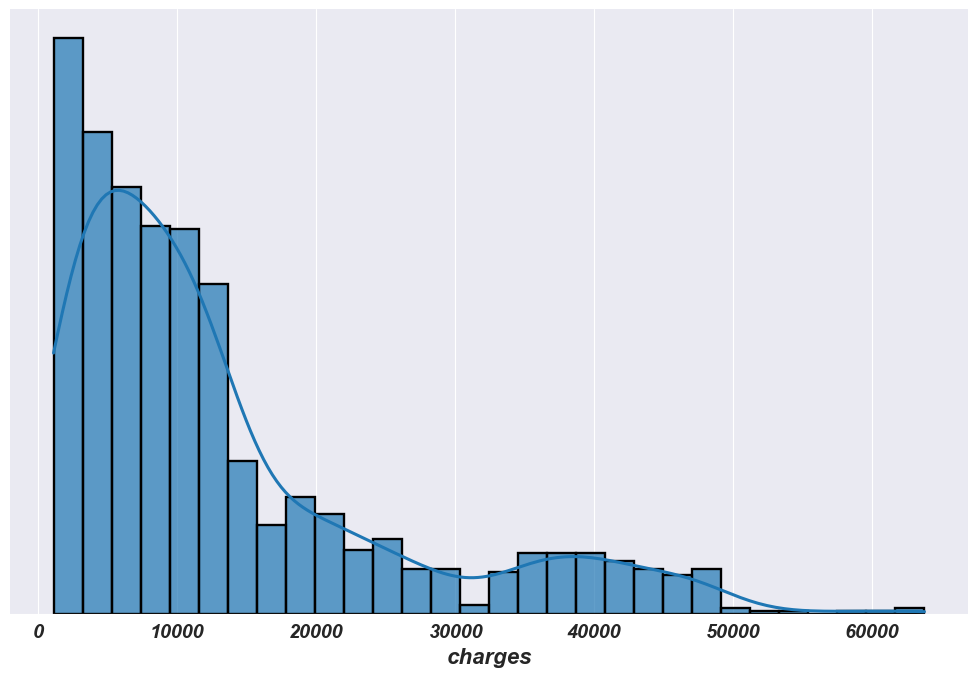

In [ ]:
# the distriubution of the target column
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.histplot(data=df, x="charges", kde=True, alpha=0.7, ax=ax, lw=2.2, ec="k")
ax.set_yticks(ticks=[])
ax.set_ylabel(ylabel="")
sns.despine(left=True, right=True, bottom=False, top=True)
plt.tight_layout()
plt.show()

In [ ]:
# the distribution is really skewed so we have to fix this for the quality of our regression
df["charges_log"] = np.log10(df["charges"])

# let's also use the square root the see how the skewness change
df["charges_sqrt"] = np.sqrt(df["charges"])

# let's also add teh logarithm with base 2
df["charges_log2"] = np.log2(df["charges"])

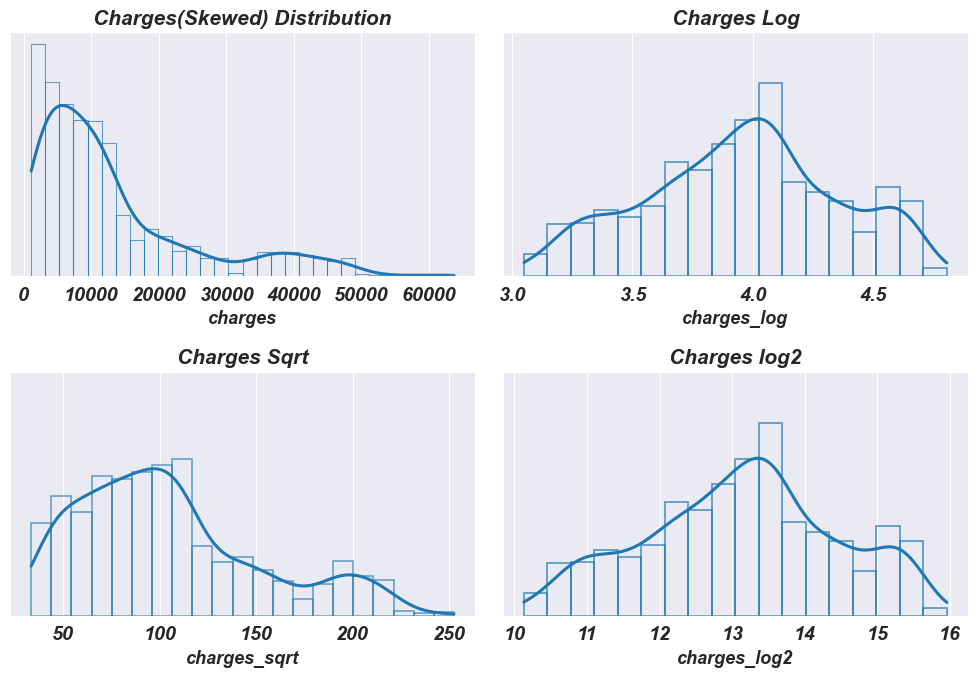

In [ ]:
# distribution and comparison with the charges column
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True)
sns.histplot(data=df, x="charges", lw=2, kde=True, alpha=0.7, ax=axes[0, 0], fill=False)
axes[0, 0].set_title(label="Charges(Skewed) Distribution")
axes[0, 0].set_yticks(ticks=[])
axes[0, 0].set_ylabel(ylabel="")

# log charges
sns.histplot(
    data=df, x="charges_log", lw=2.2, alpha=0.7, kde=True, ax=axes[0, 1], fill=False
)
axes[0, 1].set_title(label="Charges Log")

# sqrt charges
sns.histplot(
    data=df,
    x="charges_sqrt",
    lw=2.2,
    alpha=0.7,
    kde=True,
    ax=axes[1, 0],
    fill=False,
    element="bars",
)
axes[1, 0].set_title(label="Charges Sqrt")

# log 2
sns.histplot(
    data=df,
    x="charges_log2",
    fill=False,
    element="bars",
    lw=2.2,
    alpha=0.7,
    ax=axes[1, 1],
    kde=True,
)
axes[1, 1].set_title(label="Charges log2")
plt.tight_layout()
plt.show();

In [115]:
# some statistics
df.describe(include=np.number).round(decimals=2).iloc[:, :4]

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


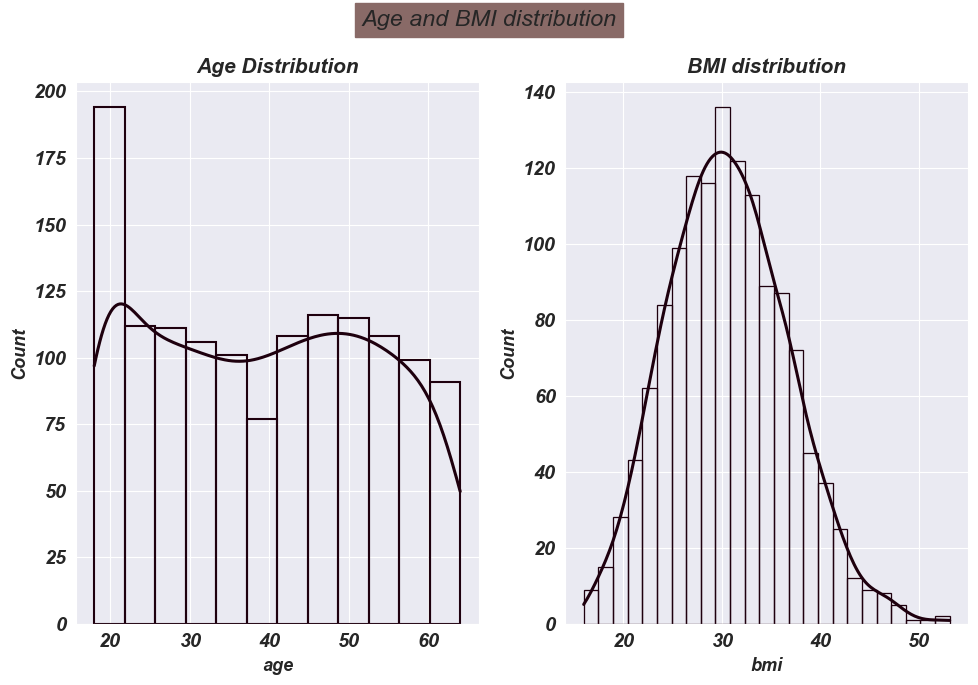

In [ ]:
# let's also obseve the distribution of the age and the bmi column
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.histplot(
    data=df,
    x="age",
    fill=False,
    color="#1E000E",
    element="bars",
    kde=True,
    line_kws={"linewidth": 2.2, "color": "#A379C9"},
    ax=axes[0],
)
fig.suptitle(t="Age and BMI distribution", backgroundcolor="#896A67")
axes[0].set_title(label="Age Distribution", fontweight="bold", fontstyle="italic")

sns.histplot(
    data=df,
    x="bmi",
    fill=False,
    kde=True,
    color="#1E000E",
    element="bars",
    line_kws={"linewidth": 2.2, "color": "#A379C9"},
    ax=axes[1],
)
axes[1].set_title(label="BMI distribution", fontweight="bold", fontstyle="italic")
plt.tight_layout()
plt.show()

In [ ]:
# let's also check the stat of the categorical column: children, sex and smoker
df["smoker"].value_counts(dropna=True, ascending=False, sort=True, normalize=False)

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
df["sex"].value_counts(normalize=False, sort=True, ascending=False, dropna=True)

sex
male      676
female    662
Name: count, dtype: int64

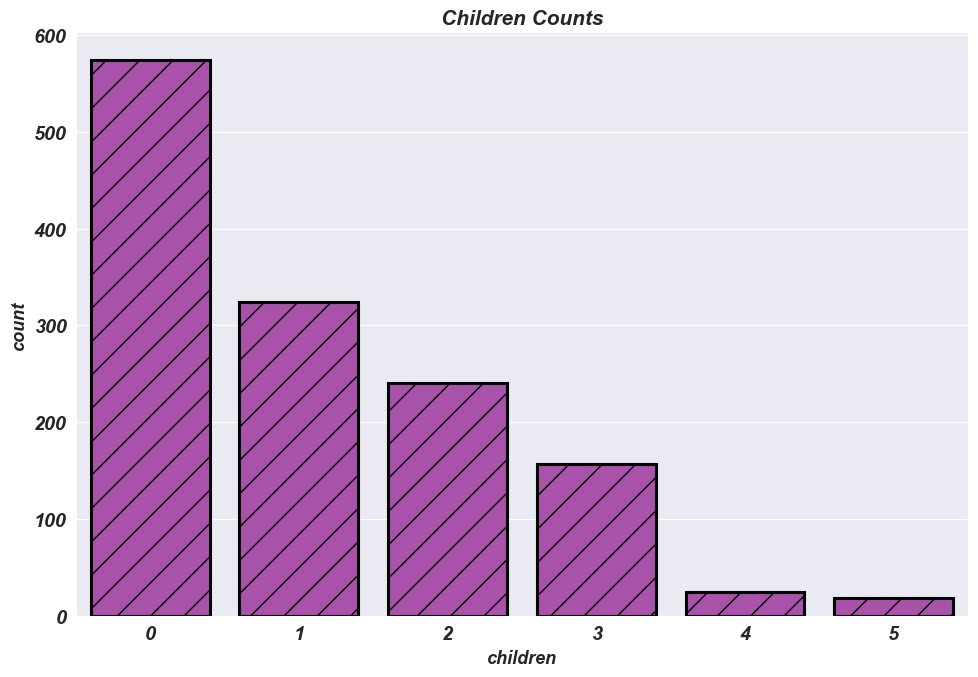

In [ ]:
# let's use a countplot to see the count for each children value
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.countplot(
    data=df, x="children", hatch="/", ec="k", lw=2.2, color="#B744B8", stat="count"
)
ax.set_title(label="Children Counts", fontweight="bold", fontstyle="italic")
plt.tight_layout()
plt.show()

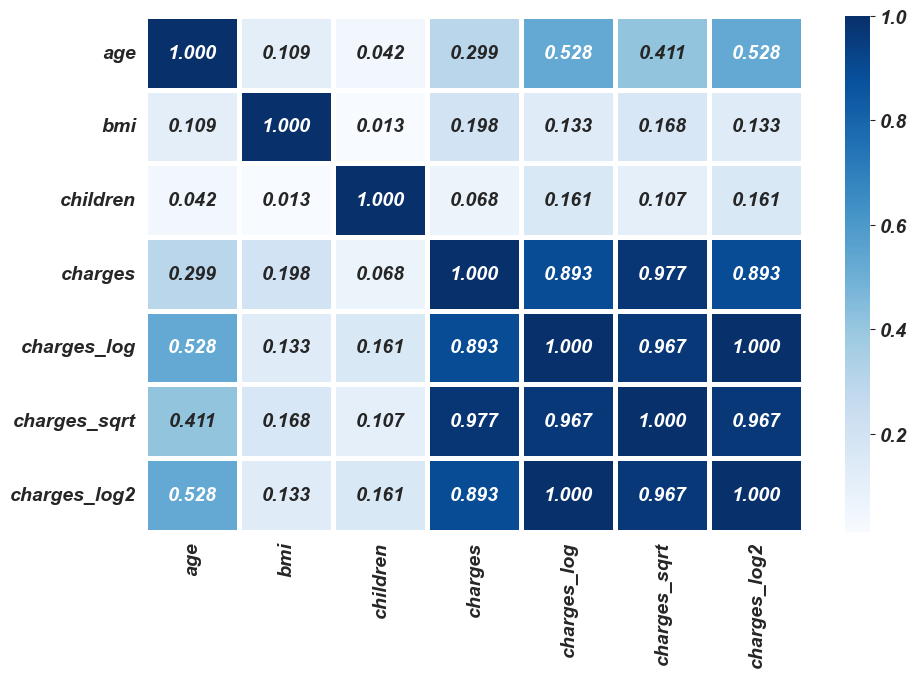

In [71]:
# The correlation
correlation_matrix = df.corr(method="pearson", numeric_only=True)
# now plot heatmap to see the correlations
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.heatmap(
    data=correlation_matrix, cmap="Blues", annot=True, ax=ax, fmt=".3f", lw=2.2, ec="k"
)
plt.tight_layout()
plt.show();

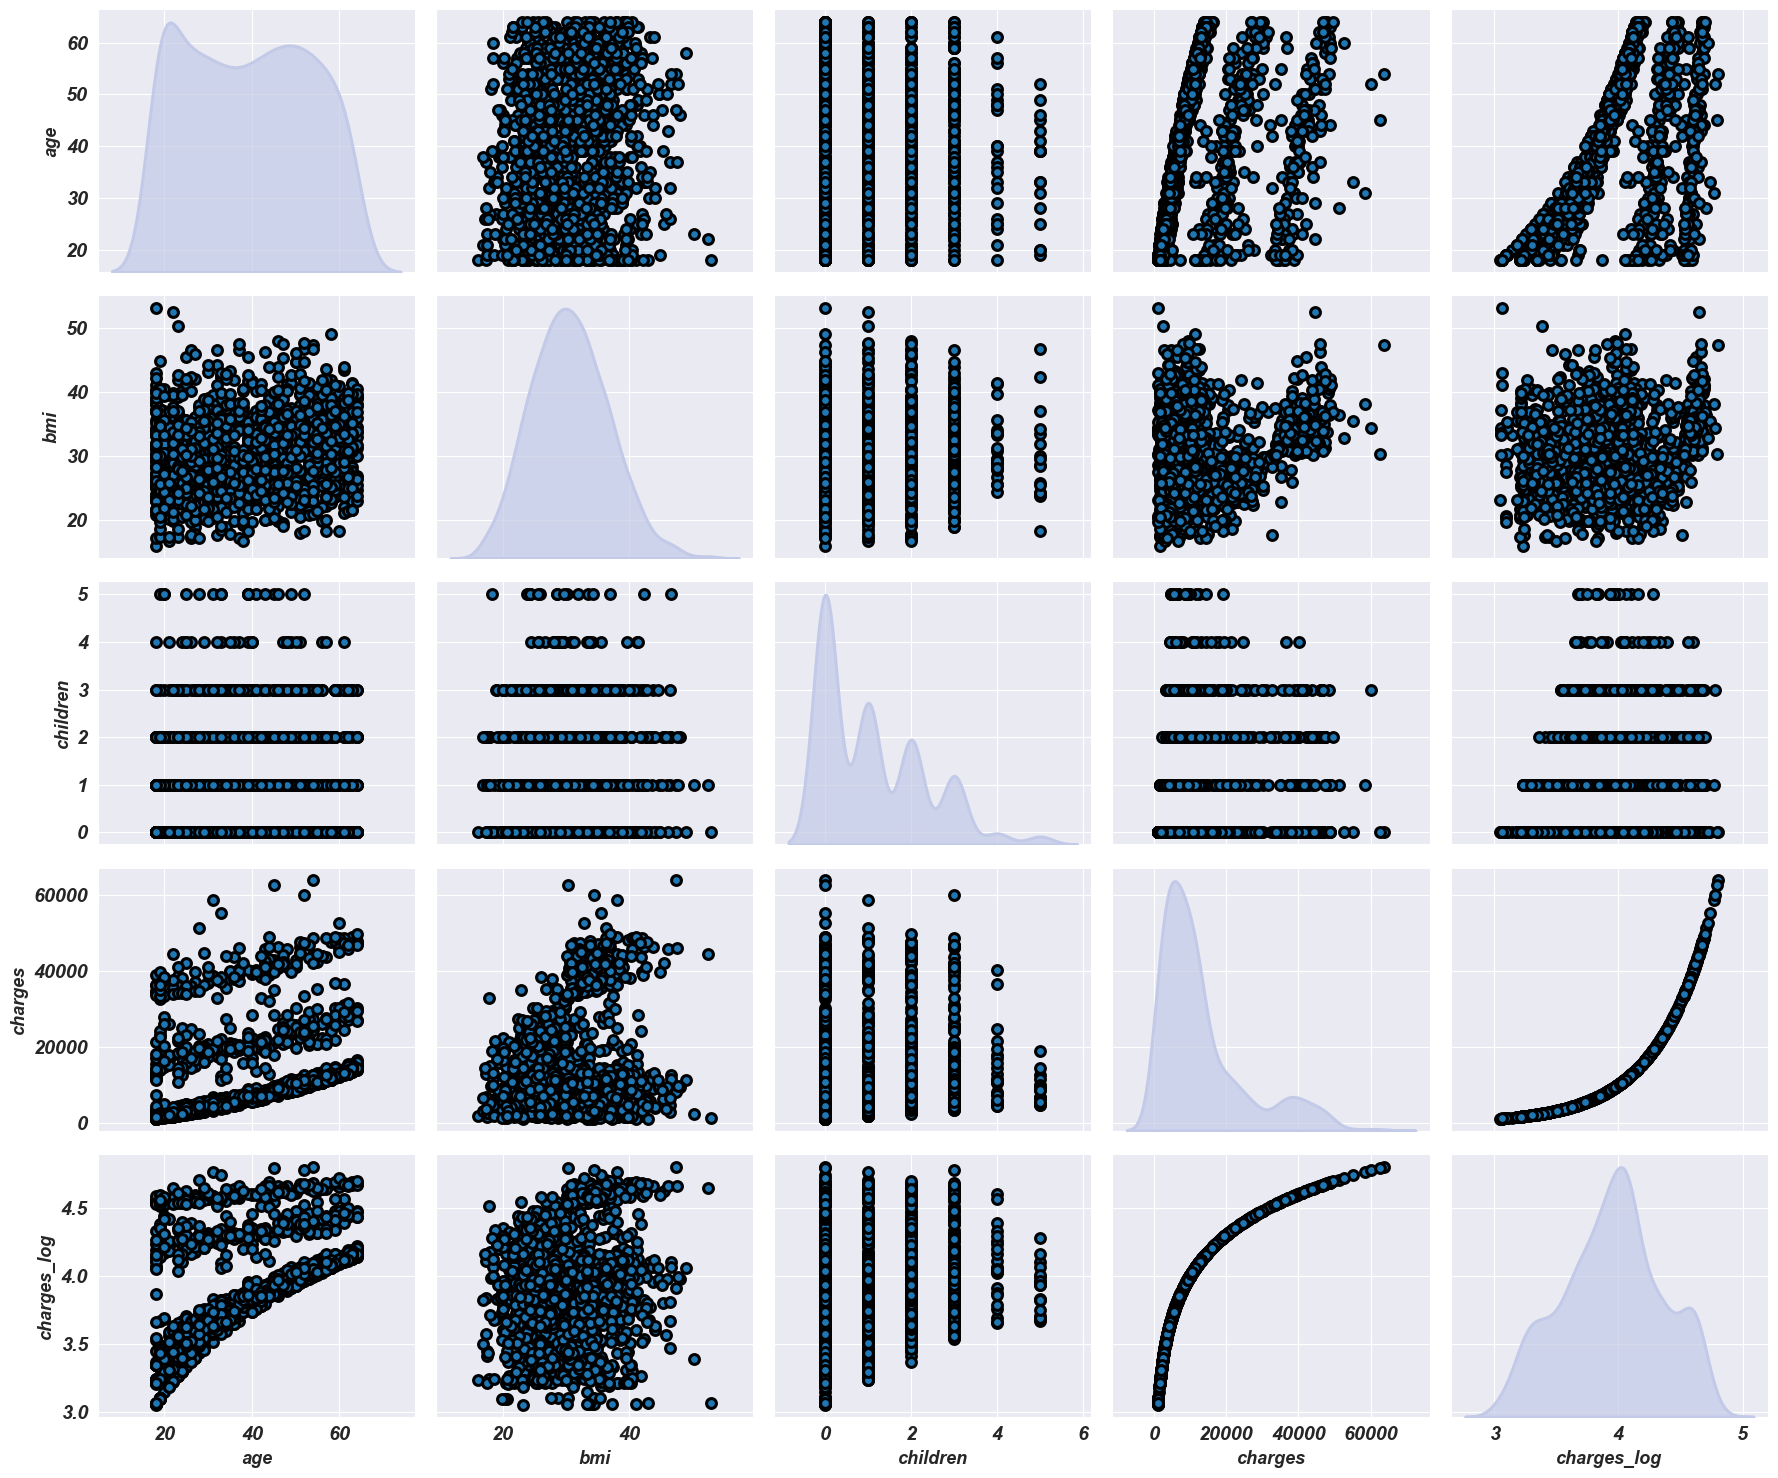

In [ ]:
# Plot of a pairplot to see the correlation with a scatterplot
df_numerics = df.select_dtypes(include=np.number, exclude=None)
sns.pairplot(
    data=df_numerics,
    diag_kind="kde",
    diag_kws={"lw": 2.2, "color": "#C2CAE8", "alpha": 0.7},
    kind="scatter",
    plot_kws={"s": 50, "ec": "k", "lw": 1.9},
    height=3,
    aspect=1.2,
)
plt.tight_layout()
plt.show();

In [91]:
df.head(n=5)

,age,sex,bmi,children,smoker,region,charges,charges_log,charges_sqrt,charges_log2
0,19,female,27.900,0,yes,southwest,16884.92400,4.227499,129.942002,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,3.236928,41.539768,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,3.648308,66.704288,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,4.342116,148.271611,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,3.587358,62.184043,11.916945


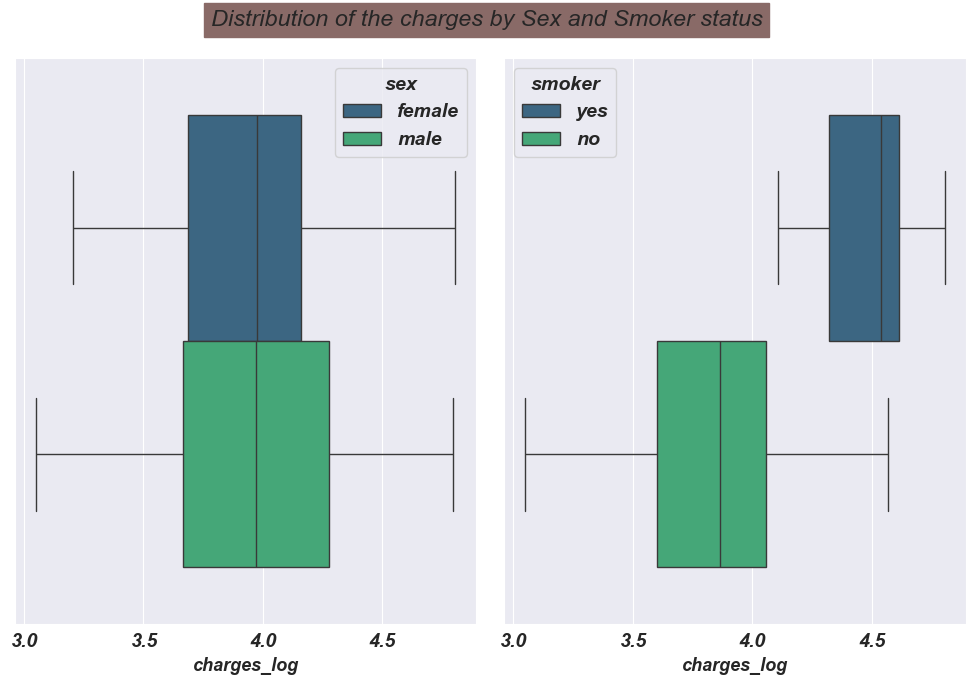

In [ ]:
# let's check how the target is distributed by the sex and the column smoker
fig, axes = plt.subplots(nrows=1, ncols=2)
# boxplot by the sex
sns.boxplot(data=df, x="charges_log", hue="sex", ax=axes[0], palette="viridis")
fig.suptitle(
    t="Distribution of the charges by Sex and Smoker status", backgroundcolor="#896A67"
)

# boxplot by the smoker status
sns.boxplot(data=df, x="charges_log", hue="smoker", ax=axes[1], palette="viridis")

plt.tight_layout()
plt.show();

In [73]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log,charges_sqrt,charges_log2
0,19,female,27.900,0,yes,southwest,16884.92400,4.227499,129.942002,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,3.236928,41.539768,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,3.648308,66.704288,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,4.342116,148.271611,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,3.587358,62.184043,11.916945


In [74]:
# on va continuer ce soir avec l'entrainmenet de mon modele
df.dtypes

age               int64
sex              object
bmi             float64
children          int64
smoker           object
region           object
charges         float64
charges_log     float64
charges_sqrt    float64
charges_log2    float64
dtype: object

In [81]:
# let's check the qualitty of the data
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

In [82]:
for col in numeric_columns:
    if (df[col] < 0).any():
        bad_data = df[col].lt(other=0)
        print(f"{col} -> {bad_data}")

In [84]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log,charges_sqrt,charges_log2
0,19,female,27.900,0,yes,southwest,16884.92400,4.227499,129.942002,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,3.236928,41.539768,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,3.648308,66.704288,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,4.342116,148.271611,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,3.587358,62.184043,11.916945


In [ ]:
# feature engineering
df["is_smoker"] = df["smoker"].apply(func=lambda x: 1 if x == "yes" else 0)

In [ ]:
features = ["age", "bmi", "is_smoker"]

In [ ]:
X = df.filter(items=features)
y = df.filter(items=["charges_log"])

In [124]:
# let's standardize the data of age and bmi
df.describe(include=np.number).round(decimals=2).iloc[:, :4]

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [138]:
# let's split our data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [141]:
standard_scal = StandardScaler()
X_train_standardize = standard_scal.fit_transform(X_train.filter(items=features[:2]))
X_test_standardize = standard_scal.transform(X_test.filter(items=features[:2]))

In [146]:
X_train.iloc[:, -1].values

array([0, 0, 0, ..., 0, 1, 0], shape=(1070,))

In [ ]:
X_train_standardize = np.hstack(
    (X_train_standardize, X_train.iloc[:, -1].values.reshape((X_train.shape[0], 1)))
)
X_test_standardize = np.hstack(
    (X_test_standardize, X_test.iloc[:, -1].values.reshape((X_test.shape[0], 1)))
)

In [132]:
# now let's check the variance of the numeric column we'll use for the training
selector = VarianceThreshold(threshold=1)
selector.fit(X_train_standardize)

,"threshold threshold: float, default=0Features with a training-set variance lower than this threshold willbe removed. The default is to keep all features with non-zero variance,i.e. remove the features that have the same value in all samples.",1


In [133]:
selector.get_support()

array([False,  True, False])

In [150]:
# creation du modele
insurance_model = LinearRegression()
insurance_model.fit(X_train_standardize, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [151]:
insurance_model.coef_

array([[0.212808  , 0.02925477, 0.67254372]])

In [152]:
y_pred_train = insurance_model.predict(X_train_standardize)

In [153]:
train_mse = mean_squared_error(y_train, y_pred_train)

In [154]:
train_mse

0.04117353122851974

In [155]:
train_r2 = r2_score(y_train, y_pred_train)
train_r2

0.737066139753993

In [156]:
y_pred_test = insurance_model.predict(X_test_standardize)

In [ ]:
test_r2 = r2_score(y_test, y_pred_test)
test_r2

0.7704945422014752

In [163]:
df.head(n=5)

,age,sex,bmi,children,smoker,region,charges,charges_log,charges_sqrt,charges_log2,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,4.227499,129.942002,14.043448,1
1,18,male,33.770,1,no,southeast,1725.55230,3.236928,41.539768,10.752842,0
2,28,male,33.000,3,no,southeast,4449.46200,3.648308,66.704288,12.119415,0
3,33,male,22.705,0,no,northwest,21984.47061,4.342116,148.271611,14.424197,0
4,32,male,28.880,0,no,northwest,3866.85520,3.587358,62.184043,11.916945,0
